In [49]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns



In [50]:
#load data 
(xtrain,ytrain),(xtest,ytest)=keras.datasets.cifar10.load_data()
# normalize data [0,1]
xtrain=xtrain.astype('float32')/255.0
xtest=xtest.astype('float32')/255.0


 Architecture 1 with weight for reconstruction loss = 1 and classification loss = 1

In [51]:
# encoder architecture 
def encoder(input):
    x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(input) 
    x=layers.MaxPooling2D((2,2))(x)   # 32 --> 16
    x=layers.Conv2D(64,(3,3),activation='relu',padding='same')(x)  
    x=layers.MaxPooling2D((2,2))(x) # 16 --> 8
    x=layers.Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x=layers.MaxPooling2D((2,2))(x)  # 8 --> 4
    return x

# decoder for reconstruction
def decoder(latent):
    x=layers.Conv2DTranspose(128,(2,2),strides=(2,2),activation='relu')(latent)  # 4 -->8
    x=layers.Conv2DTranspose(64,(2,2),strides=(2,2),activation='relu')(x)  # 8-->16
    x=layers.Conv2DTranspose(32,(2,2),strides=(2,2),activation='relu')(x)   # 16 --> 32
    x=layers.Conv2D(3,(3,3),activation='relu',padding='same')(x)
    return x

# classifier head from latent space 
def classification_head(latent):
    x=layers.Flatten()(latent)
    x=layers.Dense(2048,activation='relu')(x)
    x=layers.Dense(256,activation='relu')(x)
    x=layers.Dense(64,activation='relu')(x)
    x=layers.Dense(10,activation='softmax')(x)
    return x

def combined_arch():
    input_layer=keras.Input(shape=(32,32,3))
    encoded=encoder(input_layer)
    reconstr=decoder(encoded)
    classificatier_op=classification_head(encoded)
    model=keras.Model(inputs=input_layer, outputs=[reconstr,classificatier_op])
    model.output_names=['reconstruction_output','classifier_output']
    return model



In [52]:
model1=combined_arch()
model1.compile(optimizer='adam',loss=['mean_squared_error','categorical_crossentropy'],loss_weights=[1,1],metrics={'classifier_output':'accuracy'})

In [53]:
history1=model1.fit(xtrain,[xtrain,keras.utils.to_categorical(ytrain)],epochs=30,batch_size=32,validation_data=(xtest,[xtest,keras.utils.to_categorical(ytest)]))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 44ms/step - classifier_output_accuracy: 0.3728 - classifier_output_loss: 1.6928 - loss: 1.7340 - reconstruction_output_loss: 0.0413 - val_classifier_output_accuracy: 0.6121 - val_classifier_output_loss: 1.0877 - val_loss: 1.1067 - val_reconstruction_output_loss: 0.0192
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - classifier_output_accuracy: 0.6503 - classifier_output_loss: 0.9897 - loss: 1.0083 - reconstruction_output_loss: 0.0186 - val_classifier_output_accuracy: 0.6921 - val_classifier_output_loss: 0.8965 - val_loss: 0.9142 - val_reconstruction_output_loss: 0.0175
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - classifier_output_accuracy: 0.7372 - classifier_output_loss: 0.7558 - loss: 0.7728 - reconstruction_output_loss: 0.0171 - val_classifier_output_accuracy: 0.7053 - val_classifier_output_loss: 0.8418 - val_loss: 0.8589 - val_reconstruction_output_loss: 0.0174
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/s

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0543944].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.14900038..1.00878].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1110196].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.091752].


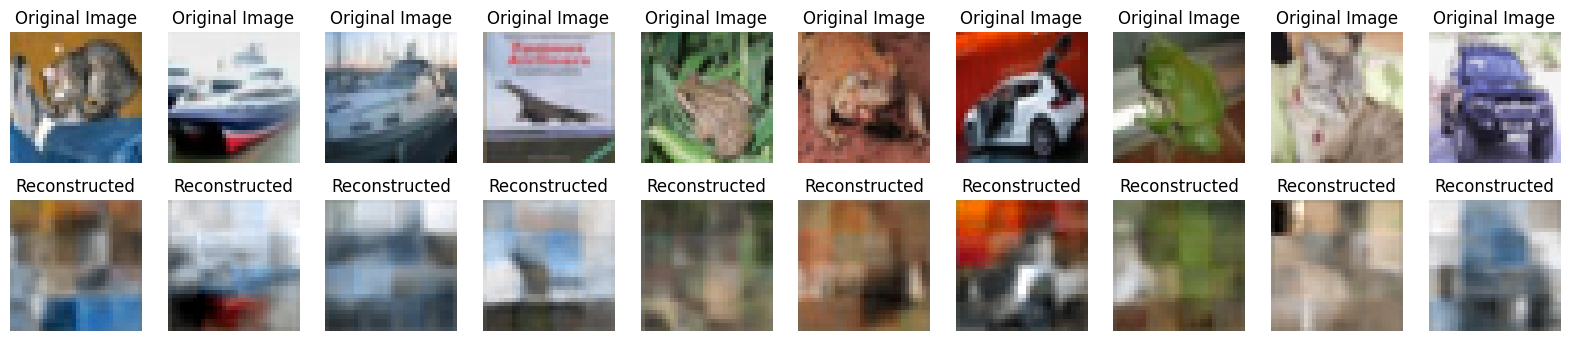

In [58]:
reconstructed=model1.predict(xtest)[0]
num_images=10
plt.figure(figsize=(20,4))
for i in range(num_images):
    plt.subplot(2,num_images,i+1)
    plt.imshow(xtest[i])    
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(2,num_images,num_images+i+1)
    plt.imshow(reconstructed[i])    
    plt.axis('off')
    plt.title('Reconstructed')
plt.show()

In [59]:
model1.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 32, 32,    │        896 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 16, 16,    │          0 │ conv2d_19[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 16, 16,    │     18,496 │ max_pooling2d_14… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 8, 8, 64)  │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 8, 8, 128) │     73,856 │ max_pooling2d_15… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 4, 4, 128) │          0 │ conv2d_21[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 2048)      │          0 │ max_pooling2d_16… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_12 │ (None, 8, 8, 128) │     65,664 │ max_pooling2d_16… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 2048)      │  4,196,352 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_13 │ (None, 16, 16,    │     32,832 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 256)       │    524,544 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_14 │ (None, 32, 32,    │      8,224 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 64)        │     16,448 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 32, 32, 3) │        867 │ conv2d_transpose… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 10)        │        650 │ dense_18[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,816,489 (56.52 MB)

 Trainable params: 4,938,829 (18.84 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,877,660 (37.68 MB)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - classifier_output_accuracy: 0.9903 - classifier_output_loss: 0.0331 - loss: 0.0476 - reconstruction_output_loss: 0.0144
classification accuracy on training data : 0.9904800057411194
reconstruction loss on training data: 0.014385306276381016
overall loss on training data : 0.045777540653944016
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - classifier_output_accuracy: 0.7380 - classifier_output_loss: 1.7121 - loss: 1.7267 - reconstruction_output_loss: 0.0146
classification accuracy on test data: 0.7383999824523926
reconstruction loss on test data: 0.014603892341256142
overall loss on test data: 1.7070587873458862


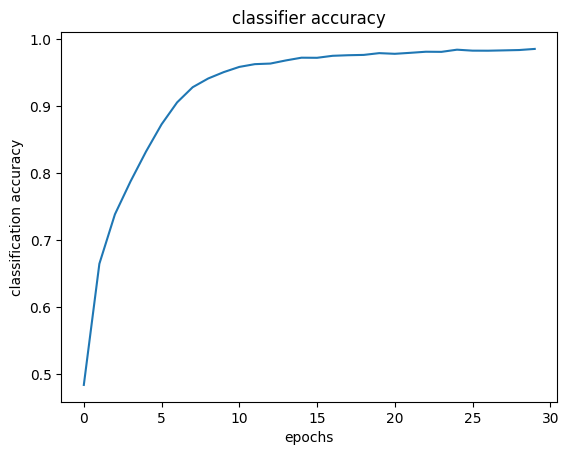

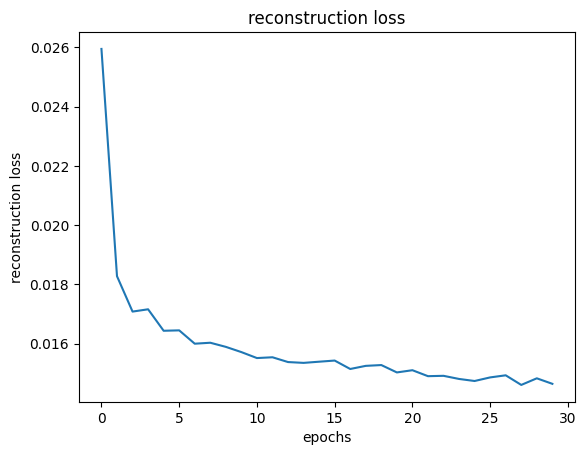

In [88]:
train_loss,trainrecon_loss,trainclassif_loss, trainclassif_acc=model1.evaluate(xtrain,[xtrain,keras.utils.to_categorical(ytrain)])
print('classification accuracy on training data :',trainclassif_acc) 
print('reconstruction loss on training data:',trainrecon_loss)
print('overall loss on training data :',train_loss)
test_loss,recon_loss,classif_loss, classif_acc=model1.evaluate(xtest,[xtest,keras.utils.to_categorical(ytest)])
print('classification accuracy on test data:',classif_acc)
print('reconstruction loss on test data:',recon_loss)
print('overall loss on test data:',test_loss)
plt.plot(history1.history['classifier_output_accuracy'])
plt.title('classifier accuracy')
plt.xlabel('epochs')
plt.ylabel('classification accuracy')
plt.show()
plt.plot(history1.history['reconstruction_output_loss'])
plt.title('reconstruction loss')
plt.xlabel('epochs')
plt.ylabel('reconstruction loss')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


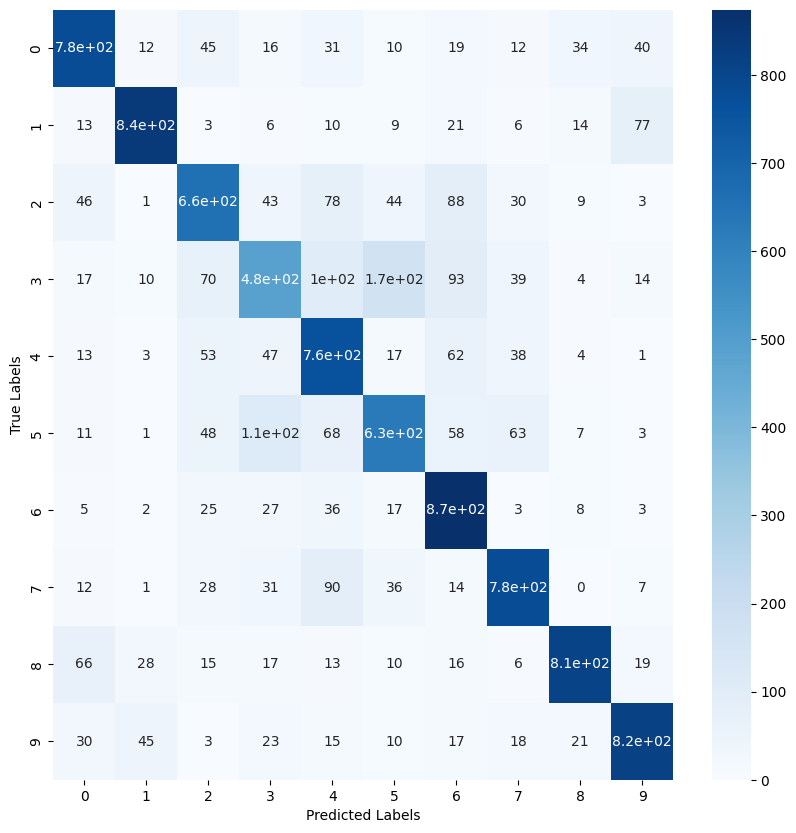

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1000
           1       0.89      0.84      0.87      1000
           2       0.69      0.66      0.68      1000
           3       0.60      0.48      0.54      1000
           4       0.63      0.76      0.69      1000
           5       0.66      0.63      0.64      1000
           6       0.69      0.87      0.77      1000
           7       0.78      0.78      0.78      1000
           8       0.89      0.81      0.85      1000
           9       0.83      0.82      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



In [67]:
classific_pred=model1.predict(xtest)[1]
cpred_labels=np.argmax(classific_pred,axis=1)
cm=confusion_matrix(ytest,cpred_labels)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
class_report=classification_report(ytest,cpred_labels)
print(class_report)

 Architecture 2 with weight for reconstruction loss =0.5 and classification loss = 0.5

In [68]:
# encoder architecture 
def encoder(input):
    x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(input) 
    x=layers.MaxPooling2D((2,2))(x)   # 32 --> 16
    x=layers.Conv2D(64,(3,3),activation='relu',padding='same')(x)  
    x=layers.MaxPooling2D((2,2))(x) # 16 --> 8
    x=layers.Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x=layers.MaxPooling2D((2,2))(x)  # 8 --> 4
    return x

# decoder for reconstruction
def decoder(latent):
    x=layers.Conv2DTranspose(128,(2,2),strides=(2,2),activation='relu')(latent)  # 4 -->8
    x=layers.Conv2DTranspose(64,(2,2),strides=(2,2),activation='relu')(x)  # 8-->16
    x=layers.Conv2DTranspose(32,(2,2),strides=(2,2),activation='relu')(x)   # 16 --> 32
    x=layers.Conv2D(3,(3,3),activation='relu',padding='same')(x)
    return x
# classifier head from latent space 
def classification_head(latent):
    x=layers.Flatten()(latent)
    x=layers.Dense(2048,activation='relu')(x)
    x=layers.Dropout(0.2)(x)
    x=layers.Dense(256,activation='relu')(x)
    x=layers.Dropout(0.2)(x)
    x=layers.Dense(64,activation='relu')(x)
    x=layers.Dropout(0.2)(x)
    x=layers.Dense(10,activation='softmax')(x)
    return x

def combined_arch():
    input_layer=keras.Input(shape=(32,32,3))
    encoded=encoder(input_layer)
    reconstr=decoder(encoded)
    classificatier_op=classification_head(encoded)
    model=keras.Model(inputs=input_layer, outputs=[reconstr,classificatier_op])
    model.output_names=['reconstruction_output','classifier_output']
    return model


In [69]:
model2=combined_arch()
model2.compile(optimizer='adam',loss=['mean_squared_error','categorical_crossentropy'],loss_weights=[0.5,0.5],metrics={'classifier_output':'accuracy'})

In [71]:
history2=model2.fit(xtrain,[xtrain,keras.utils.to_categorical(ytrain)],epochs=30,batch_size=32,validation_data=(xtest,[xtest,keras.utils.to_categorical(ytest)]))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 46ms/step - classifier_output_accuracy: 0.3442 - classifier_output_loss: 1.7531 - loss: 0.8973 - reconstruction_output_loss: 0.0415 - val_classifier_output_accuracy: 0.5904 - val_classifier_output_loss: 1.1328 - val_loss: 0.5763 - val_reconstruction_output_loss: 0.0196
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - classifier_output_accuracy: 0.6063 - classifier_output_loss: 1.1194 - loss: 0.5701 - reconstruction_output_loss: 0.0207 - val_classifier_output_accuracy: 0.6638 - val_classifier_output_loss: 0.9665 - val_loss: 0.4927 - val_reconstruction_output_loss: 0.0188
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - classifier_output_accuracy: 0.6961 - classifier_output_loss: 0.8874 - loss: 0.4534 - reconstruction_output_loss: 0.0193 - val_classifier_output_accuracy: 0.7022 - val_classifier_output_loss: 0.8536 - val_loss: 0.4364 - val_reconstruction_output_loss: 0.0191
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/s

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0174978].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.058172047..1.001375].


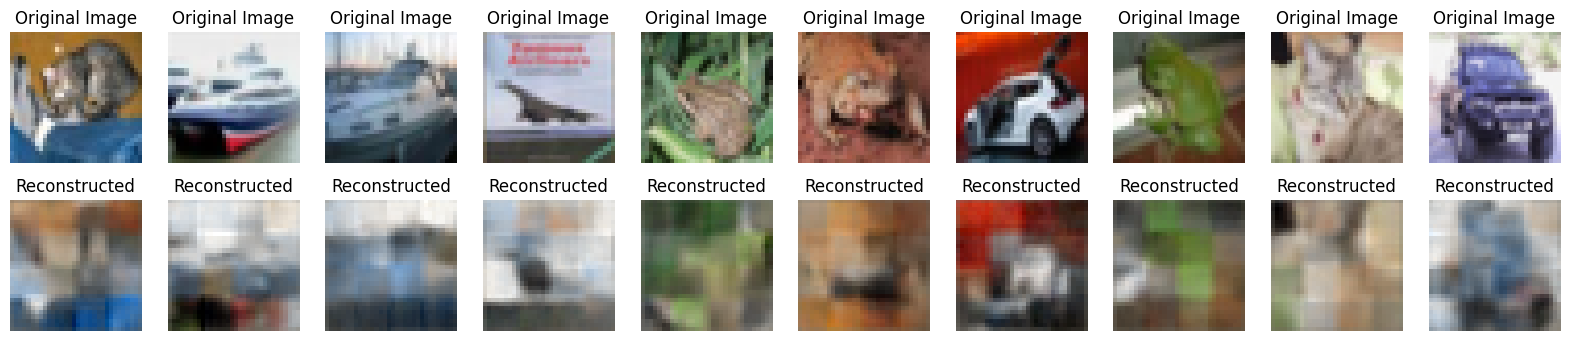

In [72]:
reconstructed=model2.predict(xtest)[0]
num_images=10
plt.figure(figsize=(20,4))
for i in range(num_images):
    plt.subplot(2,num_images,i+1)
    plt.imshow(xtest[i])    
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(2,num_images,num_images+i+1)
    plt.imshow(reconstructed[i])    
    plt.axis('off')
    plt.title('Reconstructed')
plt.show()

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - classifier_output_accuracy: 0.9939 - classifier_output_loss: 0.0219 - loss: 0.0189 - reconstruction_output_loss: 0.0159
classification accuracy on training data : 0.9937400221824646
reconstruction loss on training data: 0.015829626470804214
overall loss on training data : 0.018873417750000954
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - classifier_output_accuracy: 0.7477 - classifier_output_loss: 1.5664 - loss: 0.7912 - reconstruction_output_loss: 0.0160
classification accuracy on test data: 0.7452999949455261
reconstruction loss on test data: 0.01603207364678383
overall loss on test data: 0.7953853607177734


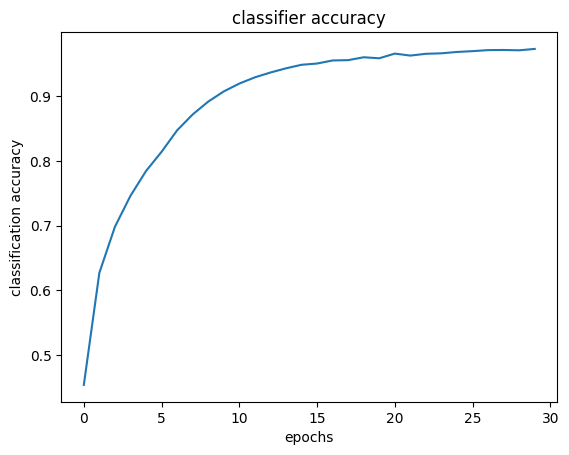

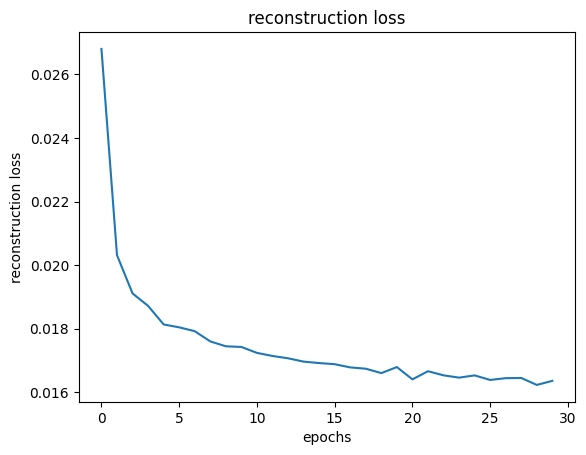

In [89]:
train_loss,trainrecon_loss,trainclassif_loss, trainclassif_acc=model2.evaluate(xtrain,[xtrain,keras.utils.to_categorical(ytrain)])
print('classification accuracy on training data :',trainclassif_acc) 
print('reconstruction loss on training data:',trainrecon_loss)
print('overall loss on training data :',train_loss)
test_loss,recon_loss,classif_loss, classif_acc=model2.evaluate(xtest,[xtest,keras.utils.to_categorical(ytest)])
print('classification accuracy on test data:',classif_acc)
print('reconstruction loss on test data:',recon_loss)
print('overall loss on test data:',test_loss)
plt.plot(history2.history['classifier_output_accuracy'])
plt.title('classifier accuracy')
plt.xlabel('epochs')
plt.ylabel('classification accuracy')
plt.show()
plt.plot(history2.history['reconstruction_output_loss'])
plt.title('reconstruction loss')
plt.xlabel('epochs')
plt.ylabel('reconstruction loss')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


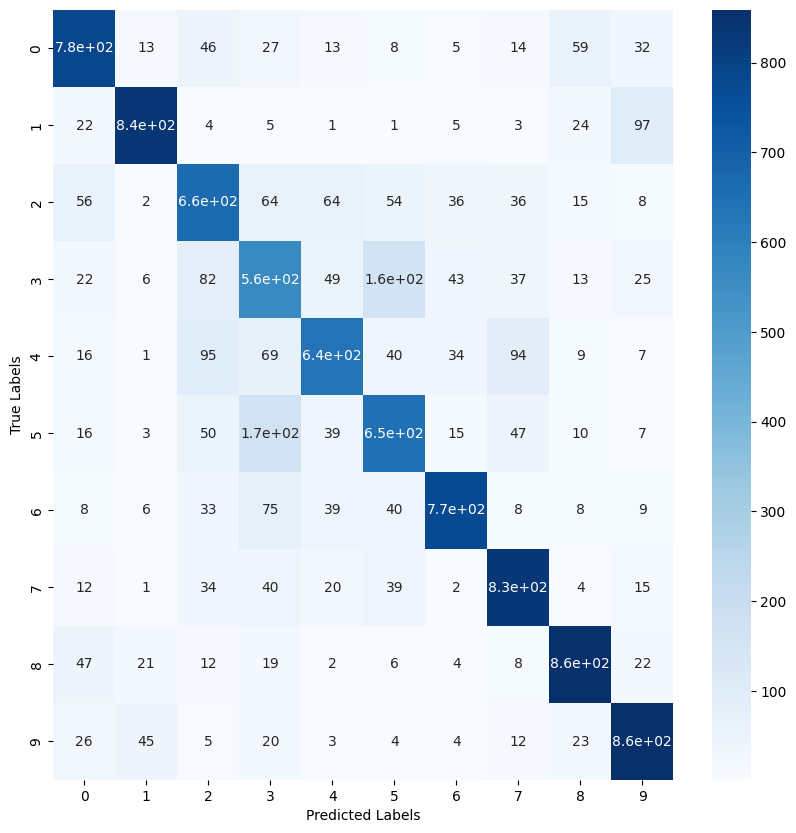

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1000
           1       0.90      0.84      0.87      1000
           2       0.65      0.67      0.66      1000
           3       0.54      0.56      0.55      1000
           4       0.73      0.64      0.68      1000
           5       0.65      0.65      0.65      1000
           6       0.84      0.77      0.81      1000
           7       0.76      0.83      0.80      1000
           8       0.84      0.86      0.85      1000
           9       0.79      0.86      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [74]:
classific_pred=model2.predict(xtest)[1]
cpred_labels=np.argmax(classific_pred,axis=1)
cm=confusion_matrix(ytest,cpred_labels)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
class_report=classification_report(ytest,cpred_labels)
print(class_report)

 Architecture 2 with weight for reconstruction loss =0.5 and classification loss = 0.8

In [75]:
model3=combined_arch()
model3.compile(optimizer='adam',loss=['mean_squared_error','categorical_crossentropy'],loss_weights=[0.5,0.8],metrics={'classifier_output':'accuracy'})

In [76]:
history3=model3.fit(xtrain,[xtrain,keras.utils.to_categorical(ytrain)],epochs=30,batch_size=32,validation_data=(xtest,[xtest,keras.utils.to_categorical(ytest)]))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - classifier_output_accuracy: 0.3337 - classifier_output_loss: 1.7758 - loss: 1.4433 - reconstruction_output_loss: 0.0453 - val_classifier_output_accuracy: 0.5721 - val_classifier_output_loss: 1.2160 - val_loss: 0.9835 - val_reconstruction_output_loss: 0.0212
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - classifier_output_accuracy: 0.6034 - classifier_output_loss: 1.1360 - loss: 0.9197 - reconstruction_output_loss: 0.0217 - val_classifier_output_accuracy: 0.6762 - val_classifier_output_loss: 0.9358 - val_loss: 0.7583 - val_reconstruction_output_loss: 0.0197
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - classifier_output_accuracy: 0.6952 - classifier_output_loss: 0.8911 - loss: 0.7232 - reconstruction_output_loss: 0.0206 - val_classifier_output_accuracy: 0.7100 - val_classifier_output_loss: 0.8417 - val_loss: 0.6826 - val_reconstruction_output_loss: 0.0198
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/s

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0563843].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08947337..1.0156935].


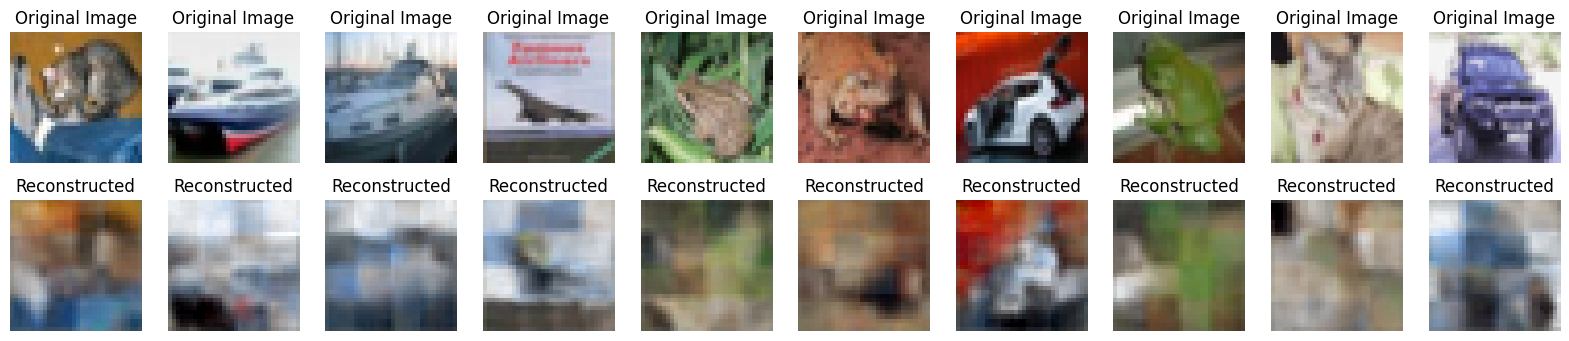

In [77]:
reconstructed=model3.predict(xtest)[0]
num_images=10
plt.figure(figsize=(20,4))
for i in range(num_images):
    plt.subplot(2,num_images,i+1)
    plt.imshow(xtest[i])    
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(2,num_images,num_images+i+1)
    plt.imshow(reconstructed[i])    
    plt.axis('off')
    plt.title('Reconstructed')
plt.show()

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - classifier_output_accuracy: 0.9915 - classifier_output_loss: 0.0270 - loss: 0.0304 - reconstruction_output_loss: 0.0177
classification accuracy on training data : 0.9916599988937378
reconstruction loss on training data: 0.017672691494226456
overall loss on training data : 0.03087633289396763
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - classifier_output_accuracy: 0.7397 - classifier_output_loss: 1.7040 - loss: 1.3722 - reconstruction_output_loss: 0.0179
classification accuracy on test data: 0.7440000176429749
reconstruction loss on test data: 0.017909055575728416
overall loss on test data: 1.3155715465545654


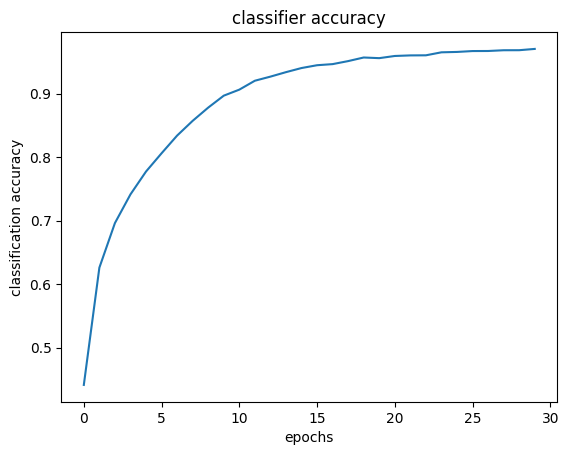

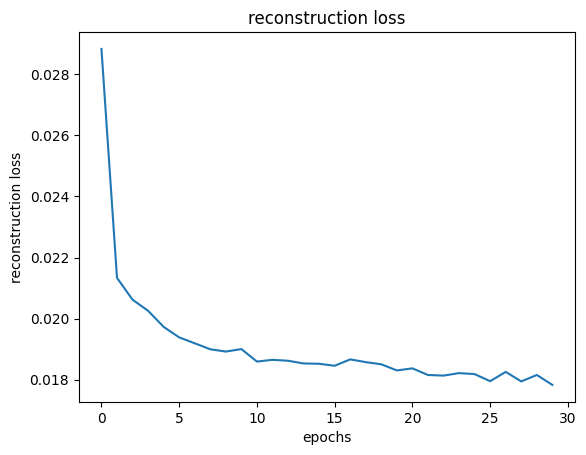

In [90]:
train_loss,trainrecon_loss,trainclassif_loss, trainclassif_acc=model3.evaluate(xtrain,[xtrain,keras.utils.to_categorical(ytrain)])
print('classification accuracy on training data :',trainclassif_acc) 
print('reconstruction loss on training data:',trainrecon_loss)
print('overall loss on training data :',train_loss)
test_loss,recon_loss,classif_loss, classif_acc=model3.evaluate(xtest,[xtest,keras.utils.to_categorical(ytest)])
print('classification accuracy on test data:',classif_acc)
print('reconstruction loss on test data:',recon_loss)
print('overall loss on test data:',test_loss)
plt.plot(history3.history['classifier_output_accuracy'])
plt.title('classifier accuracy')
plt.xlabel('epochs')
plt.ylabel('classification accuracy')
plt.show()
plt.plot(history3.history['reconstruction_output_loss'])
plt.title('reconstruction loss')
plt.xlabel('epochs')
plt.ylabel('reconstruction loss')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


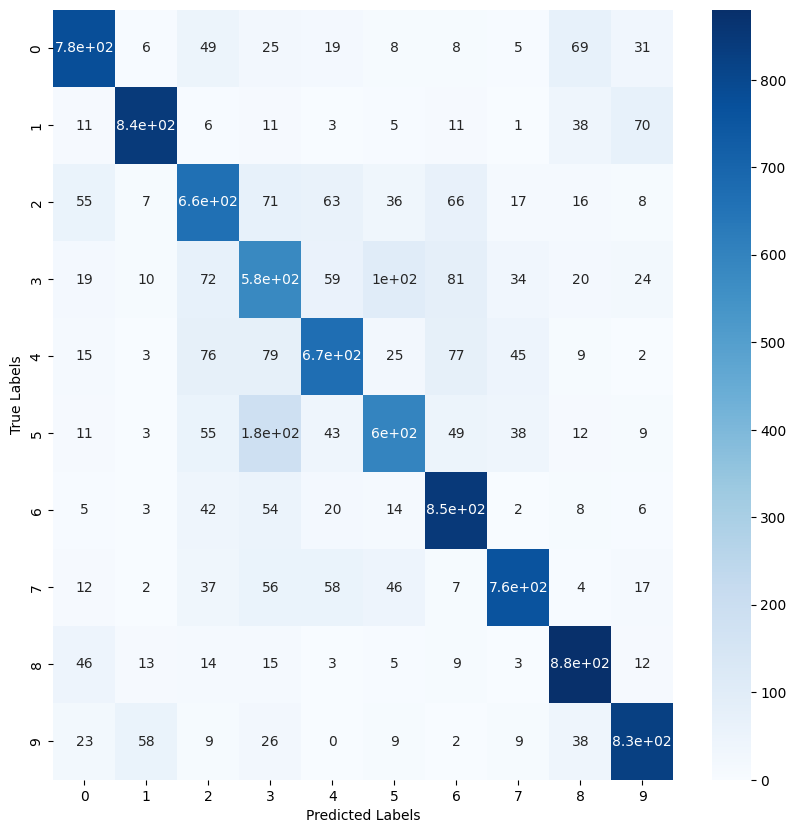

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1000
           1       0.89      0.84      0.87      1000
           2       0.65      0.66      0.65      1000
           3       0.53      0.58      0.55      1000
           4       0.71      0.67      0.69      1000
           5       0.70      0.59      0.64      1000
           6       0.73      0.85      0.78      1000
           7       0.83      0.76      0.79      1000
           8       0.80      0.88      0.84      1000
           9       0.82      0.83      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



In [84]:
classific_pred=model3.predict(xtest)[1]
cpred_labels=np.argmax(classific_pred,axis=1)
cm=confusion_matrix(ytest,cpred_labels)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
class_report=classification_report(ytest,cpred_labels)
print(class_report)

 Architecture 2 with weight for reconstruction loss =0.7 and classification loss = 0.3

In [80]:
model4=combined_arch()
model4.compile(optimizer='adam',loss=['mean_squared_error','categorical_crossentropy'],loss_weights=[0.7,0.3],metrics={'classifier_output':'accuracy'})

In [81]:
history4=model4.fit(xtrain,[xtrain,keras.utils.to_categorical(ytrain)],epochs=30,batch_size=32,validation_data=(xtest,[xtest,keras.utils.to_categorical(ytest)]))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 46ms/step - classifier_output_accuracy: 0.3427 - classifier_output_loss: 1.7719 - loss: 0.5584 - reconstruction_output_loss: 0.0383 - val_classifier_output_accuracy: 0.5999 - val_classifier_output_loss: 1.1476 - val_loss: 0.3579 - val_reconstruction_output_loss: 0.0195
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - classifier_output_accuracy: 0.6101 - classifier_output_loss: 1.1090 - loss: 0.3452 - reconstruction_output_loss: 0.0178 - val_classifier_output_accuracy: 0.6890 - val_classifier_output_loss: 0.9051 - val_loss: 0.2832 - val_reconstruction_output_loss: 0.0166
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - classifier_output_accuracy: 0.7002 - classifier_output_loss: 0.8746 - loss: 0.2741 - reconstruction_output_loss: 0.0168 - val_classifier_output_accuracy: 0.7087 - val_classifier_output_loss: 0.8609 - val_loss: 0.2698 - val_reconstruction_output_loss: 0.0165
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/s

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0319675].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.06840366..1.0103242].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.13735121..1.0527973].


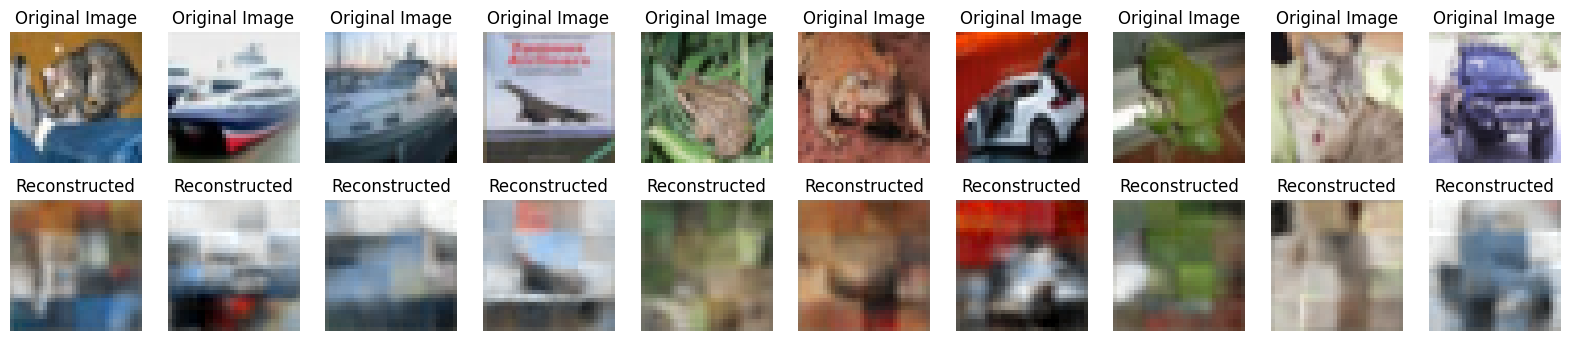

In [82]:
reconstructed=model4.predict(xtest)[0]
num_images=10
plt.figure(figsize=(20,4))
for i in range(num_images):
    plt.subplot(2,num_images,i+1)
    plt.imshow(xtest[i])    
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(2,num_images,num_images+i+1)
    plt.imshow(reconstructed[i])    
    plt.axis('off')
    plt.title('Reconstructed')
plt.show()

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - classifier_output_accuracy: 0.9922 - classifier_output_loss: 0.0244 - loss: 0.0173 - reconstruction_output_loss: 0.0143
classification accuracy on training data : 0.9920600056648254
reconstruction loss on training data: 0.014259960502386093
overall loss on training data : 0.01751643419265747
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - classifier_output_accuracy: 0.7542 - classifier_output_loss: 1.4603 - loss: 0.4482 - reconstruction_output_loss: 0.0145
classification accuracy on test data: 0.7480000257492065
reconstruction loss on test data: 0.014470280148088932
overall loss on test data: 0.45816880464553833


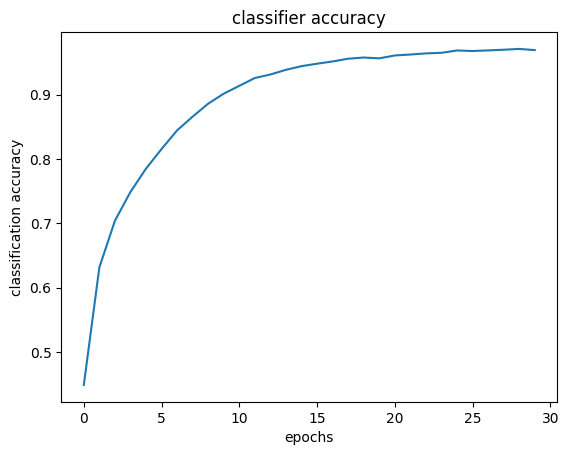

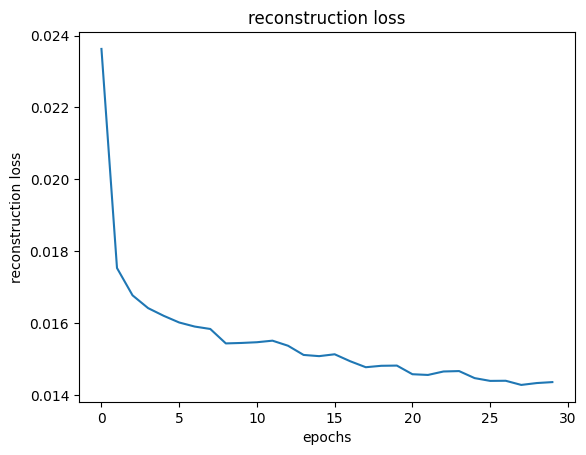

In [91]:
train_loss,trainrecon_loss,trainclassif_loss, trainclassif_acc=model4.evaluate(xtrain,[xtrain,keras.utils.to_categorical(ytrain)])
print('classification accuracy on training data :',trainclassif_acc) 
print('reconstruction loss on training data:',trainrecon_loss)
print('overall loss on training data :',train_loss)
test_loss,recon_loss,classif_loss, classif_acc=model4.evaluate(xtest,[xtest,keras.utils.to_categorical(ytest)])
print('classification accuracy on test data:',classif_acc)
print('reconstruction loss on test data:',recon_loss)
print('overall loss on test data:',test_loss)
plt.plot(history4.history['classifier_output_accuracy'])
plt.title('classifier accuracy')
plt.xlabel('epochs')
plt.ylabel('classification accuracy')
plt.show()
plt.plot(history4.history['reconstruction_output_loss'])
plt.title('reconstruction loss')
plt.xlabel('epochs')
plt.ylabel('reconstruction loss')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


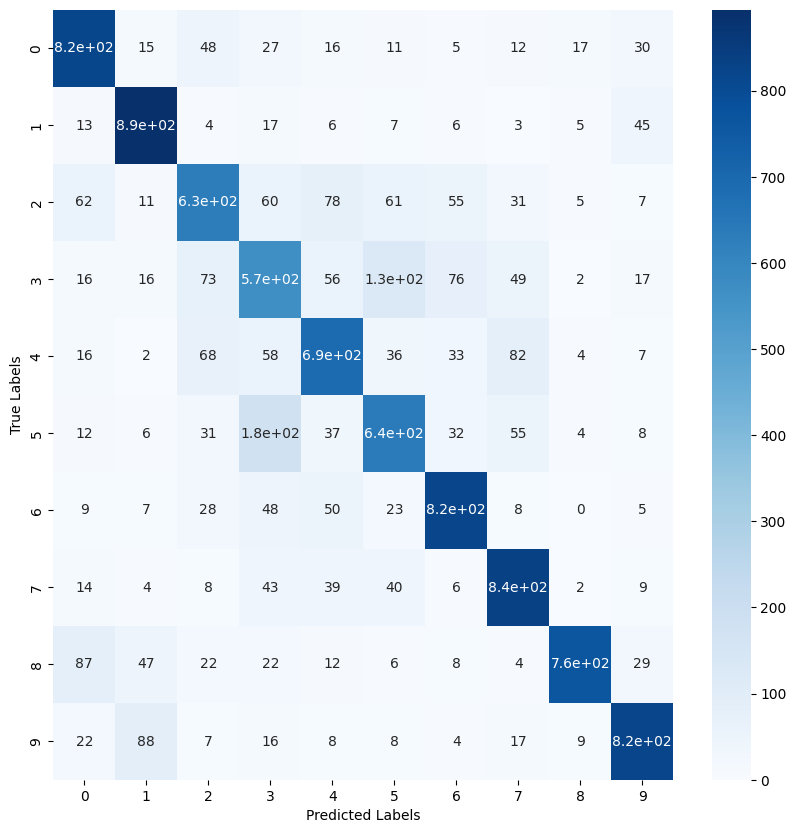

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1000
           1       0.82      0.89      0.86      1000
           2       0.69      0.63      0.66      1000
           3       0.55      0.57      0.56      1000
           4       0.70      0.69      0.70      1000
           5       0.66      0.64      0.65      1000
           6       0.79      0.82      0.80      1000
           7       0.76      0.83      0.80      1000
           8       0.94      0.76      0.84      1000
           9       0.84      0.82      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [87]:
classific_pred=model4.predict(xtest)[1]
cpred_labels=np.argmax(classific_pred,axis=1)
cm=confusion_matrix(ytest,cpred_labels)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
class_report=classification_report(ytest,cpred_labels)
print(class_report)